In [3]:
from ultralytics import YOLO
import torch

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"Using device: {device}")

In [ ]:
model = YOLO("yolo11m.pt")

# train the model
model.train(
    data="../data/data.yaml",
    epochs=25,
    imgsz=640,
    batch=16,
    device='0')  # specify the GPU device, e.g., "0" for the first GPU


In [ ]:
# save the model
model.save("yolo11m_trained.pt")

# test the model
predictions = model.predict(
    source="../data/test/images",
    conf=0.25,
    save=True,
    save_txt=True,
    save_conf=True,
    device=device
)



In [17]:
import cv2
import glob
import os
from ultralytics import YOLO

# 1) Load your trained model
model = YOLO("yolo11m_trained.pt")

# 2) Run inference (no need for save=True)
results = model.predict(
    source="../data/test/images",
    conf=0.25,
    device="cuda"   # or "cpu"
)

# 3) Prepare VideoWriter using the size of the first plotted frame
first_annotated = results[0].plot()               # returns BGR numpy array
h, w, _ = first_annotated.shape
fps = 2                                          # adjust to taste
fourcc = cv2.VideoWriter_fourcc(*"mp4v")
out = cv2.VideoWriter("yolo11m_test_output.mp4", fourcc, fps, (w, h))

# 4) Loop through all results, plot each, and write to the video
for r in results:
    annotated_frame = r.plot()   # draws boxes/labels on a copy of the frame
    out.write(annotated_frame)

out.release()
print("✅ Saved annotated video as yolo11m_test_output.mp4")



image 1/39 c:\Users\ngjun\Desktop\Codes\flying_plate\training\..\data\test\images\frame104_jpg.rf.dc09eca37ece9a8979eca48a36e55a5b.jpg: 640x640 1 disc, 122.9ms
image 2/39 c:\Users\ngjun\Desktop\Codes\flying_plate\training\..\data\test\images\frame104_jpg.rf.e29c32470c9572ed7a0ad243f852a9fa.jpg: 640x640 (no detections), 14.0ms
image 3/39 c:\Users\ngjun\Desktop\Codes\flying_plate\training\..\data\test\images\frame107_jpg.rf.2bed1f5a15324ad8fc50039fd05b315a.jpg: 640x640 (no detections), 14.0ms
image 4/39 c:\Users\ngjun\Desktop\Codes\flying_plate\training\..\data\test\images\frame118_jpg.rf.f60a44b14130073fa5490064c3b82ec5.jpg: 640x640 (no detections), 14.0ms
image 5/39 c:\Users\ngjun\Desktop\Codes\flying_plate\training\..\data\test\images\frame119_jpg.rf.dde3cb35139711ca1946ec068134b27a.jpg: 640x640 (no detections), 14.0ms
image 6/39 c:\Users\ngjun\Desktop\Codes\flying_plate\training\..\data\test\images\frame122_jpg.rf.0bd64cf1c489ca8db9a025d48fc596d0.jpg: 640x640 (no detections), 14.0ms

In [23]:
import os
import imageio
import cv2
from ultralytics import YOLO

# 1) Load your trained model
model = YOLO("yolo11m_trained.pt")

# 2) Read the source GIF into a list of frames (as RGB arrays)
gif_path    = "../edge_test/waitforit-wait.gif"
frames_rgb  = imageio.mimread(gif_path, memtest=False)

# 3) Prepare a list to collect annotated frames
annotated = []

# 4) Loop over each frame
for i, frame in enumerate(frames_rgb):
    # YOLO expects BGR on CPU/GPU, so convert:
    frame_bgr = cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)

    # Run a single-image prediction (batch of 1)
    results = model.predict(
        source=frame_bgr,
        conf=0.1,
        save=False,
        device="cuda"  # or "cpu"
    )

    # results is a list of length 1; get the plotted BGR image
    out_bgr = results[0].plot()

    # Convert back to RGB for GIF
    out_rgb = cv2.cvtColor(out_bgr, cv2.COLOR_BGR2RGB)
    annotated.append(out_rgb)

# 5) Write annotated frames back out as a new GIF
output_gif = "../edge_test/waitforit-wait-annotated.gif"
imageio.mimsave(output_gif, annotated, fps=3)   # tweak fps as desired
print(f"✅ Annotated GIF written to {output_gif}")



0: 640x384 (no detections), 56.1ms
Speed: 4.4ms preprocess, 56.1ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 (no detections), 13.2ms
Speed: 0.9ms preprocess, 13.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 (no detections), 9.2ms
Speed: 1.1ms preprocess, 9.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 (no detections), 9.2ms
Speed: 1.0ms preprocess, 9.2ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 (no detections), 9.2ms
Speed: 0.9ms preprocess, 9.2ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 (no detections), 10.2ms
Speed: 1.2ms preprocess, 10.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 (no detections), 9.6ms
Speed: 0.9ms preprocess, 9.6ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 (no detections), 9.3ms
Speed: 0.8ms preprocess, 9.3ms inference, 

In [10]:
test_img = "../assets/demo.jpg"

# read the image and show in imshow
import cv2
image = cv2.imread(test_img)
cv2.imshow("Test Image", image)
cv2.waitKey(0)



-1


image 1/1 c:\Users\ngjun\Desktop\Codes\flying_plate\training\..\assets\demo.jpg: 640x640 1 disc, 64.8ms
Speed: 3.2ms preprocess, 64.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict10
1 label saved to runs\detect\predict10\labels


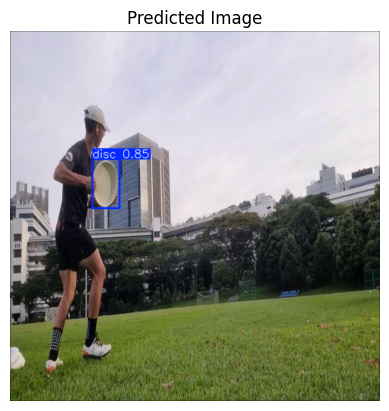

True

In [12]:
# predict on the image
model = YOLO("yolo11m_trained.pt")
results = model.predict(
    source=test_img,
    conf=0.6,
    save=True,
    save_txt=True,
    save_conf=True,
    device='0'
)

# show the image with bounding boxes
import matplotlib.pyplot as plt
import numpy as np
# Convert the first result to a numpy array
annotated_image = results[0].plot()
# Convert BGR to RGB for matplotlib
annotated_image_rgb = cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB)
# Display the image
plt.imshow(annotated_image_rgb)
plt.axis('off')  # Hide axes
plt.title("Predicted Image")
plt.show()

# save the annotated image
output_image_path = "../assets/annotated_image.jpg"
cv2.imwrite(output_image_path, annotated_image)
